In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv("/content/drive/MyDrive/CS/IoT_Intrusion.csv")

## **Data Exploration**

In [35]:
df

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,54.00,6.00,64.00,0.329807,0.329807,0.0,1,0,1,...,0.000000,54.00,8.334383e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood
1,0.000000,57.04,6.33,64.00,4.290556,4.290556,0.0,0,0,0,...,2.822973,57.04,8.292607e+07,9.5,10.464666,4.010353,160.987842,0.05,141.55,DoS-TCP_Flood
2,0.000000,0.00,1.00,64.00,33.396799,33.396799,0.0,0,0,0,...,0.000000,42.00,8.312799e+07,9.5,9.165151,0.000000,0.000000,0.00,141.55,DDoS-ICMP_Flood
3,0.328175,76175.00,17.00,64.00,4642.133010,4642.133010,0.0,0,0,0,...,0.000000,50.00,8.301570e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DoS-UDP_Flood
4,0.117320,101.73,6.11,65.91,6.202211,6.202211,0.0,0,1,0,...,23.113111,57.88,8.297300e+07,9.5,11.346876,32.716243,3016.808286,0.19,141.55,DoS-SYN_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.391925,108.00,6.00,64.00,1.437685,1.437685,0.0,0,1,0,...,0.000000,54.00,8.336550e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-SynonymousIP_Flood
1048571,0.000000,2.14,46.70,65.91,0.000000,0.000000,0.0,0,0,0,...,5.281048,588.22,8.367732e+07,9.5,34.370618,7.497140,469.190222,0.06,141.55,Mirai-greeth_flood
1048572,0.132971,30847.00,17.00,64.00,5978.034950,5978.034950,0.0,0,0,0,...,0.000000,50.00,8.312373e+07,9.5,10.000000,0.000000,0.000000,0.00,141.55,DDoS-UDP_Flood
1048573,0.000000,54.00,6.00,64.00,25.672981,25.672981,0.0,1,0,1,...,0.000000,54.00,8.334509e+07,9.5,10.392305,0.000000,0.000000,0.00,141.55,DDoS-RSTFINFlood


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 47 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1048575 non-null  float64
 1   Header_Length    1048575 non-null  float64
 2   Protocol Type    1048575 non-null  float64
 3   Duration         1048575 non-null  float64
 4   Rate             1048575 non-null  float64
 5   Srate            1048575 non-null  float64
 6   Drate            1048575 non-null  float64
 7   fin_flag_number  1048575 non-null  int64  
 8   syn_flag_number  1048575 non-null  int64  
 9   rst_flag_number  1048575 non-null  int64  
 10  psh_flag_number  1048575 non-null  int64  
 11  ack_flag_number  1048575 non-null  int64  
 12  ece_flag_number  1048575 non-null  int64  
 13  cwr_flag_number  1048575 non-null  int64  
 14  ack_count        1048575 non-null  float64
 15  syn_count        1048575 non-null  float64
 16  fin_count        1

In [37]:
tmp_sorted_df = df.groupby(by="label").agg("count").sort_values(by="flow_duration", ascending=False)
labels, counts = tmp_sorted_df["flow_duration"].index, tmp_sorted_df["flow_duration"].values

In [38]:
len(labels)

34

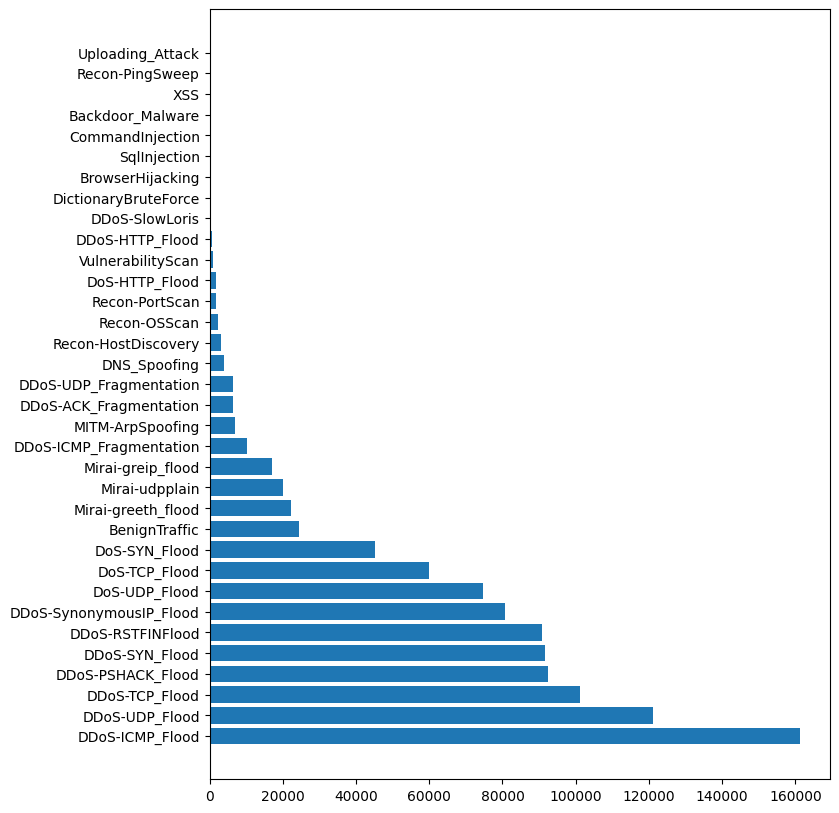

In [39]:
plt.figure(figsize=(8, 10))
plt.barh(labels, counts)
plt.show()

## **Categorical Data**

In [40]:
df.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [41]:
categorical_data = [row for row in df.columns if len(pd.unique(df[row])) <= 2]
categorical_data

['fin_flag_number',
 'syn_flag_number',
 'rst_flag_number',
 'psh_flag_number',
 'ack_flag_number',
 'ece_flag_number',
 'cwr_flag_number',
 'HTTP',
 'HTTPS',
 'DNS',
 'Telnet',
 'SMTP',
 'SSH',
 'IRC',
 'TCP',
 'UDP',
 'DHCP',
 'ARP',
 'ICMP',
 'IPv',
 'LLC']

array([[<Axes: title={'center': 'fin_flag_number'}>,
        <Axes: title={'center': 'syn_flag_number'}>,
        <Axes: title={'center': 'rst_flag_number'}>,
        <Axes: title={'center': 'psh_flag_number'}>,
        <Axes: title={'center': 'ack_flag_number'}>],
       [<Axes: title={'center': 'ece_flag_number'}>,
        <Axes: title={'center': 'cwr_flag_number'}>,
        <Axes: title={'center': 'HTTP'}>,
        <Axes: title={'center': 'HTTPS'}>,
        <Axes: title={'center': 'DNS'}>],
       [<Axes: title={'center': 'Telnet'}>,
        <Axes: title={'center': 'SMTP'}>,
        <Axes: title={'center': 'SSH'}>, <Axes: title={'center': 'IRC'}>,
        <Axes: title={'center': 'TCP'}>],
       [<Axes: title={'center': 'UDP'}>,
        <Axes: title={'center': 'DHCP'}>,
        <Axes: title={'center': 'ARP'}>,
        <Axes: title={'center': 'ICMP'}>,
        <Axes: title={'center': 'IPv'}>],
       [<Axes: title={'center': 'LLC'}>, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >]], 

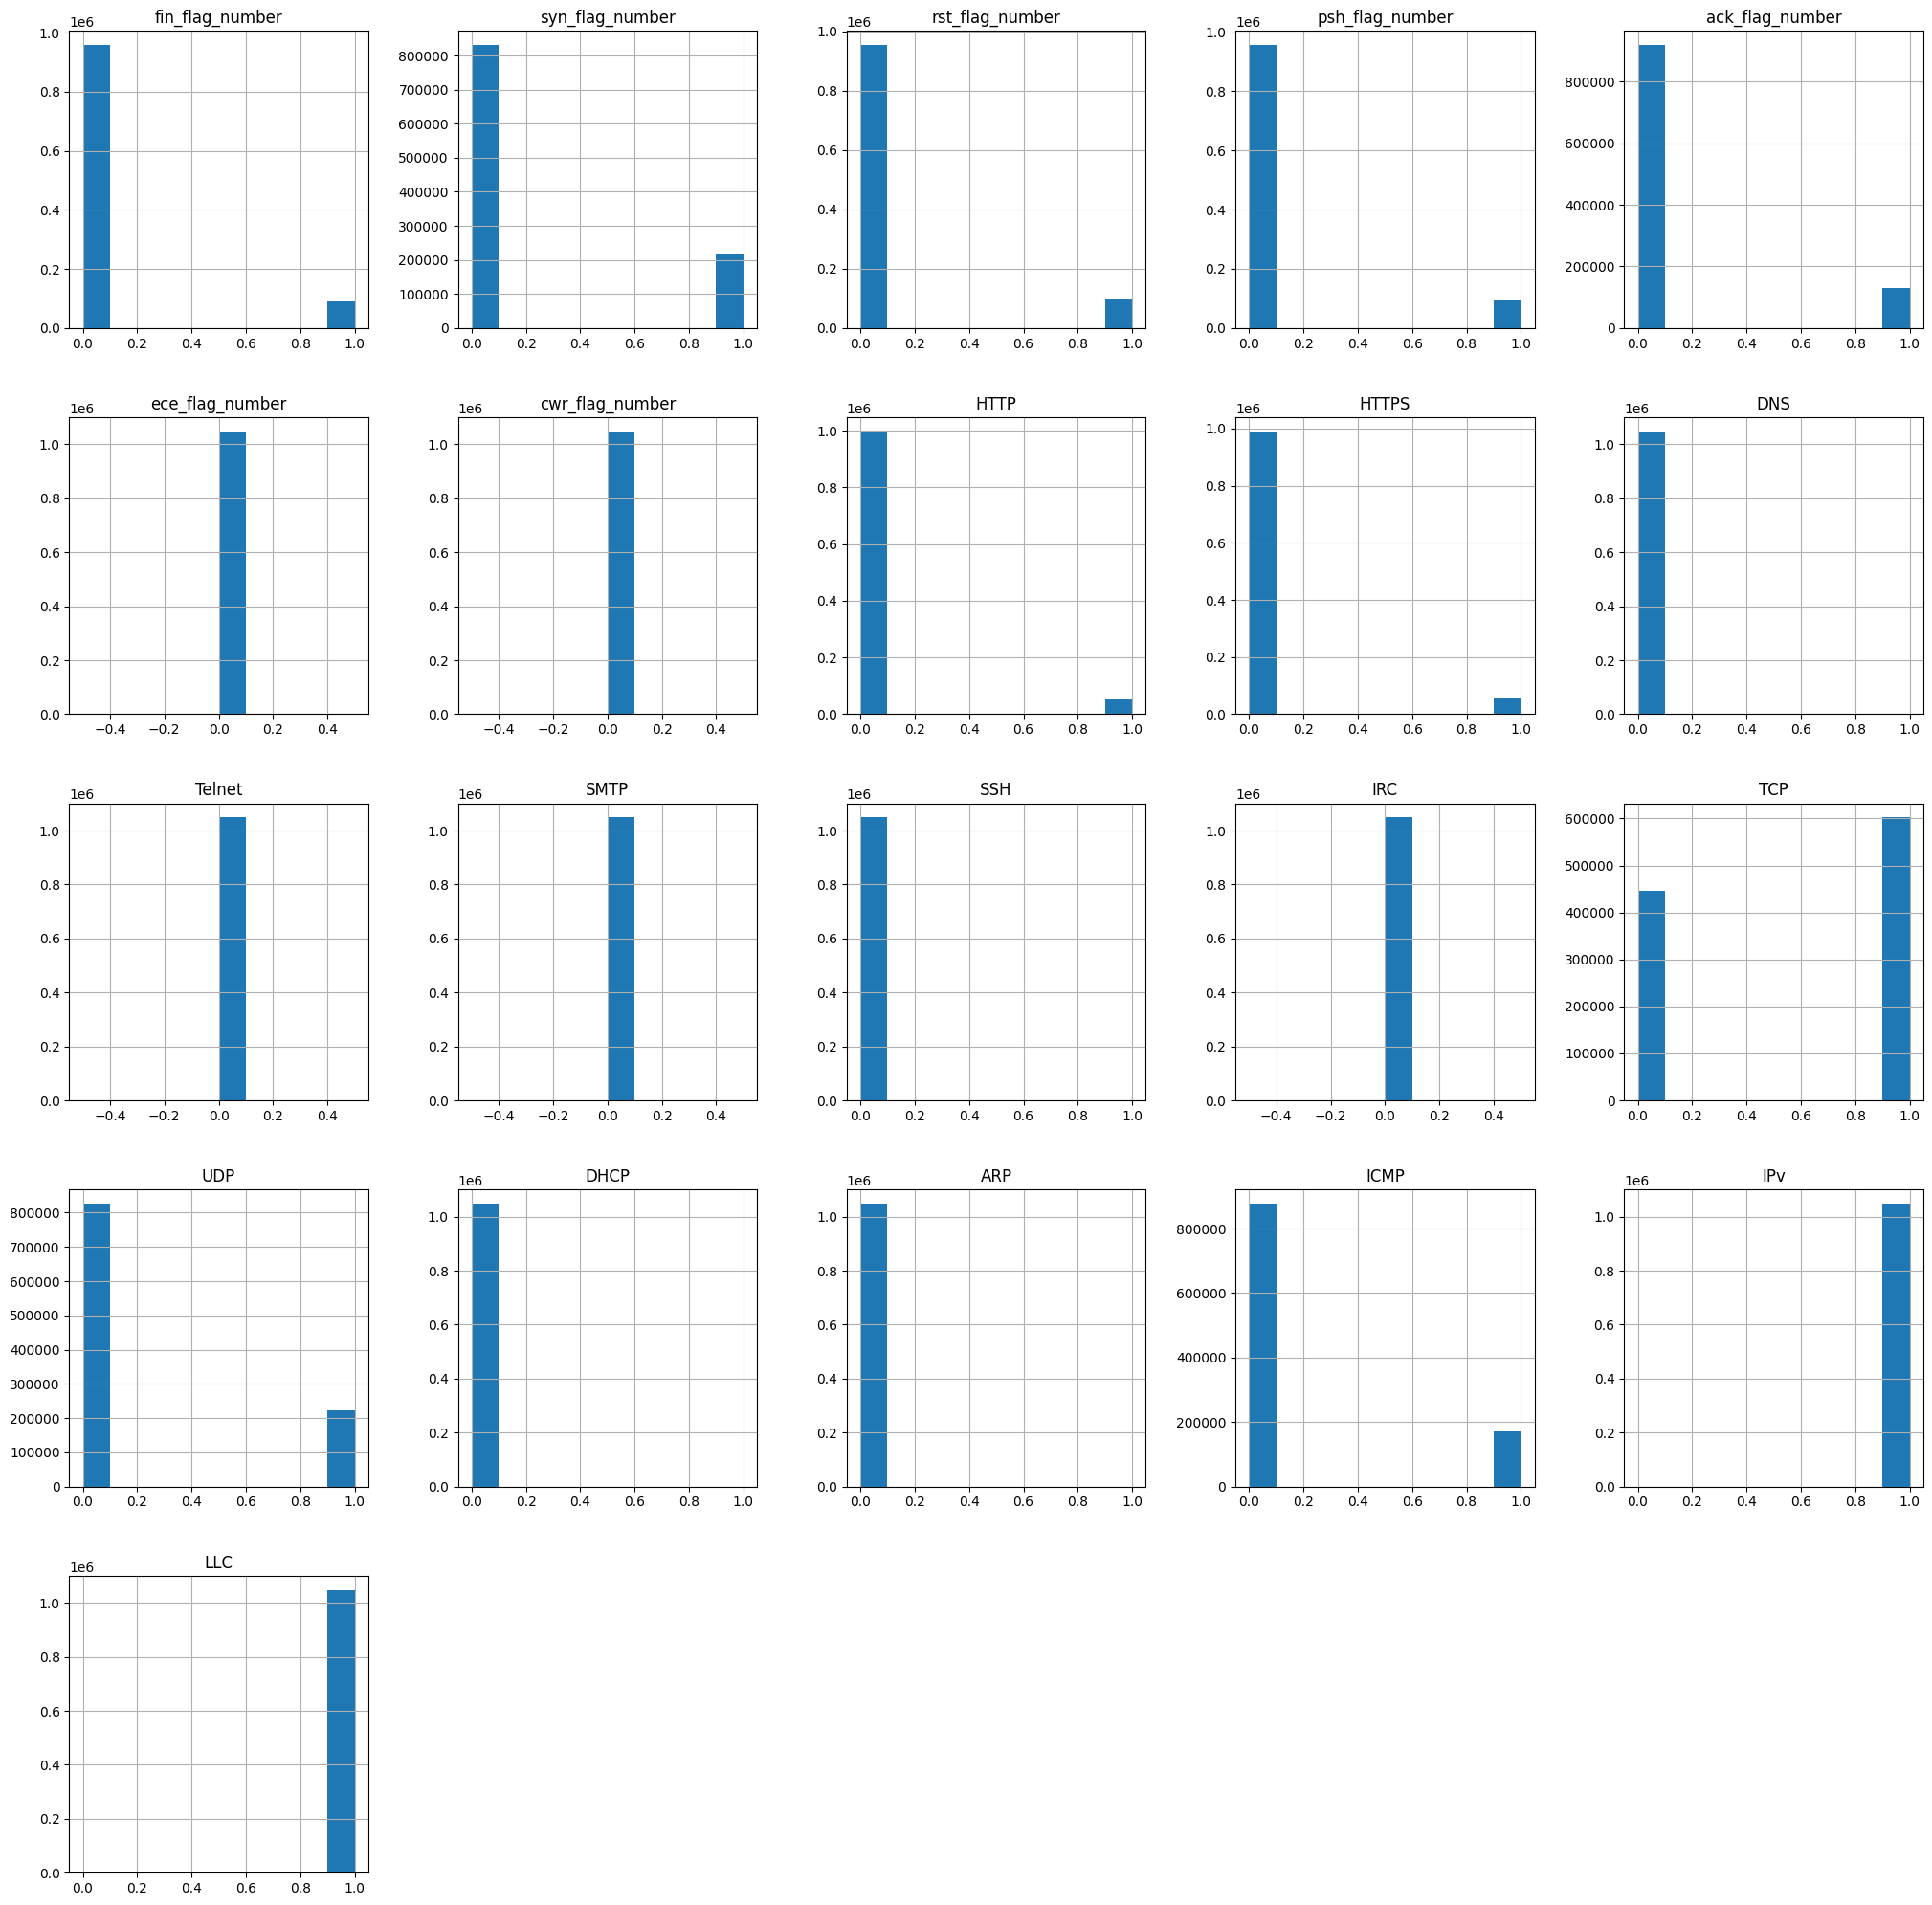

In [42]:
df[categorical_data].hist(figsize=(25, 25))

In [43]:
for column in categorical_data:
    print(np.unique(df[column], return_counts=True))

(array([0, 1]), array([957812,  90763]))
(array([0, 1]), array([831196, 217379]))
(array([0, 1]), array([953604,  94971]))
(array([0, 1]), array([956193,  92382]))
(array([0, 1]), array([918708, 129867]))
(array([0]), array([1048575]))
(array([0]), array([1048575]))
(array([0, 1]), array([997735,  50840]))
(array([0, 1]), array([990633,  57942]))
(array([0, 1]), array([1048433,     142]))
(array([0]), array([1048575]))
(array([0]), array([1048575]))
(array([0, 1]), array([1048512,      63]))
(array([0]), array([1048575]))
(array([0, 1]), array([446278, 602297]))
(array([0, 1]), array([826349, 222226]))
(array([0, 1]), array([1048573,       2]))
(array([0, 1]), array([1048505,      70]))
(array([0, 1]), array([877307, 171268]))
(array([0, 1]), array([    119, 1048456]))
(array([0, 1]), array([    119, 1048456]))


In [44]:
def valid_categorical_features_selector(dataframe, total_categorical_data):
    result = []

    for column in categorical_data:
        elements, counts = np.unique(df[column], return_counts=True)

        if not (elements.shape[0] == 1 or counts[0] < 150 or counts[1] < 150):
            result.append(column)

    return result

In [45]:
valid_categorical_data = valid_categorical_features_selector(df, categorical_data)
valid_categorical_data

['fin_flag_number',
 'syn_flag_number',
 'rst_flag_number',
 'psh_flag_number',
 'ack_flag_number',
 'HTTP',
 'HTTPS',
 'TCP',
 'UDP',
 'ICMP']

array([[<Axes: title={'center': 'fin_flag_number'}>,
        <Axes: title={'center': 'syn_flag_number'}>,
        <Axes: title={'center': 'rst_flag_number'}>],
       [<Axes: title={'center': 'psh_flag_number'}>,
        <Axes: title={'center': 'ack_flag_number'}>,
        <Axes: title={'center': 'HTTP'}>],
       [<Axes: title={'center': 'HTTPS'}>,
        <Axes: title={'center': 'TCP'}>, <Axes: title={'center': 'UDP'}>],
       [<Axes: title={'center': 'ICMP'}>, <Axes: >, <Axes: >]],
      dtype=object)

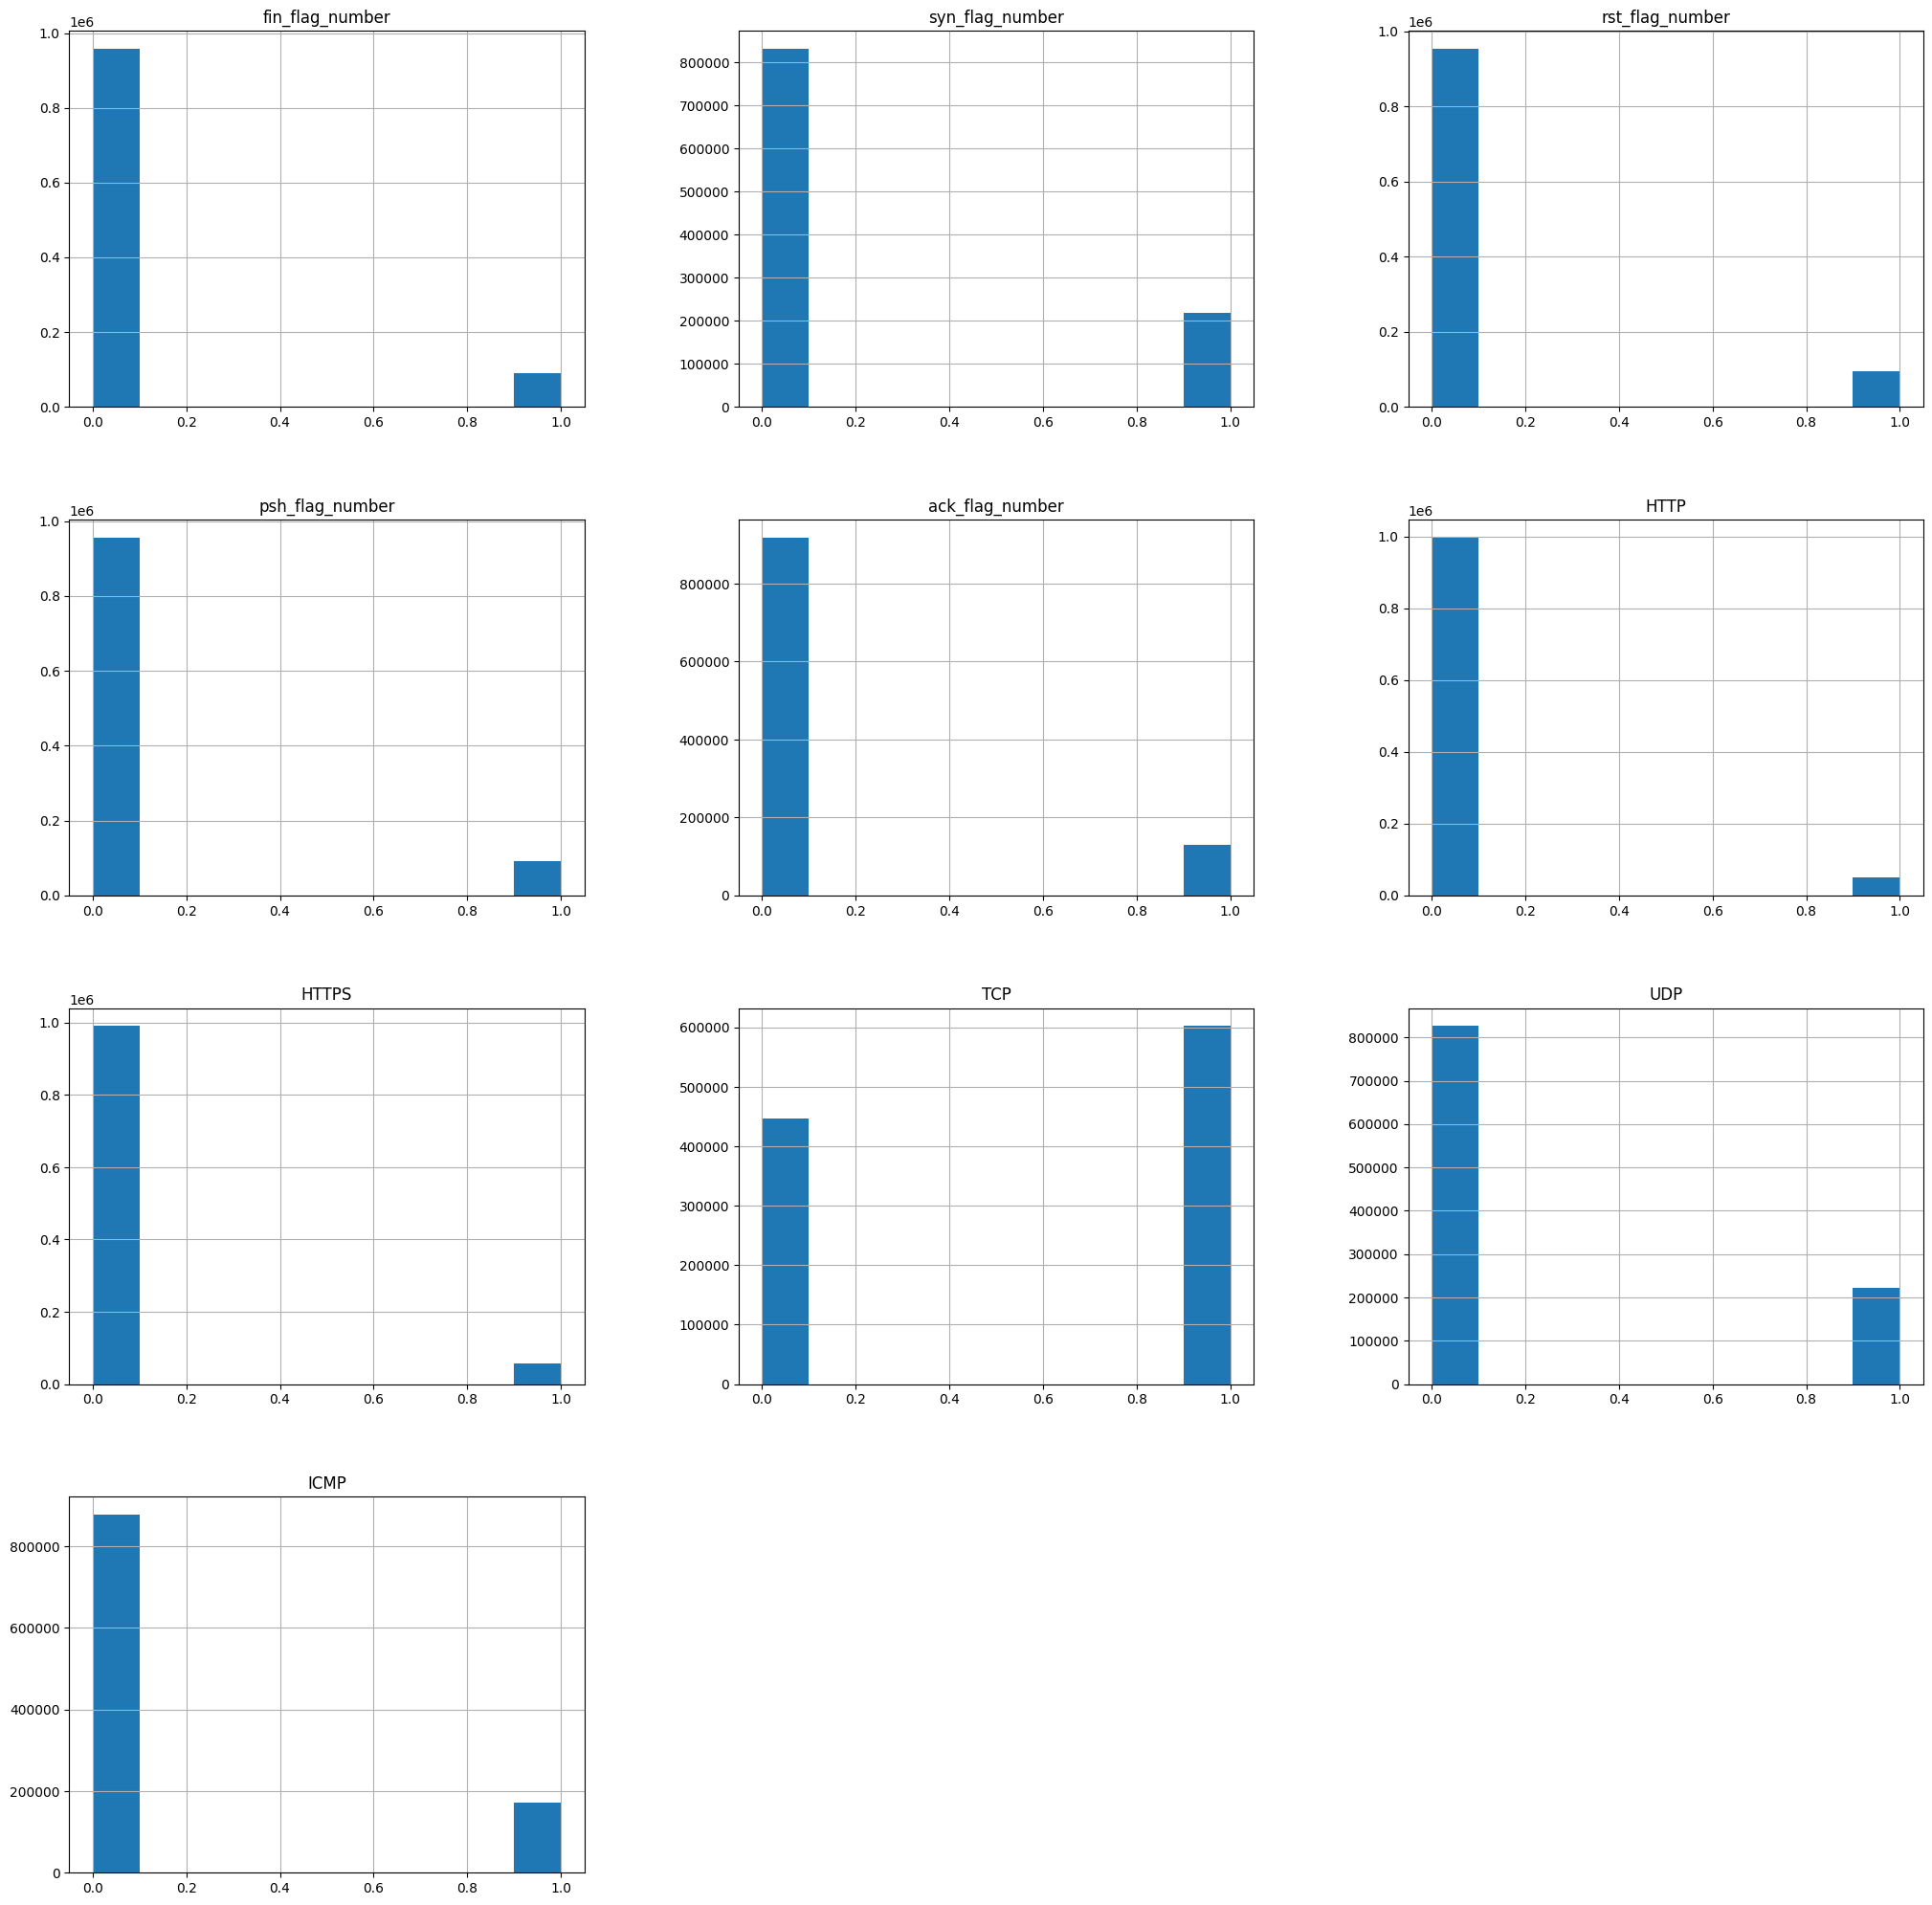

In [46]:
df[valid_categorical_data].hist(figsize=(25, 25))

# **Numerical Data**

In [47]:
numeric_data = [row for row in df.columns if row not in categorical_data]
numeric_data

['flow_duration',
 'Header_Length',
 'Protocol Type',
 'Duration',
 'Rate',
 'Srate',
 'Drate',
 'ack_count',
 'syn_count',
 'fin_count',
 'urg_count',
 'rst_count',
 'Tot sum',
 'Min',
 'Max',
 'AVG',
 'Std',
 'Tot size',
 'IAT',
 'Number',
 'Magnitue',
 'Radius',
 'Covariance',
 'Variance',
 'Weight',
 'label']

array([[<Axes: title={'center': 'flow_duration'}>,
        <Axes: title={'center': 'Header_Length'}>,
        <Axes: title={'center': 'Protocol Type'}>,
        <Axes: title={'center': 'Duration'}>,
        <Axes: title={'center': 'Rate'}>],
       [<Axes: title={'center': 'Srate'}>,
        <Axes: title={'center': 'Drate'}>,
        <Axes: title={'center': 'ack_count'}>,
        <Axes: title={'center': 'syn_count'}>,
        <Axes: title={'center': 'fin_count'}>],
       [<Axes: title={'center': 'urg_count'}>,
        <Axes: title={'center': 'rst_count'}>,
        <Axes: title={'center': 'Tot sum'}>,
        <Axes: title={'center': 'Min'}>, <Axes: title={'center': 'Max'}>],
       [<Axes: title={'center': 'AVG'}>, <Axes: title={'center': 'Std'}>,
        <Axes: title={'center': 'Tot size'}>,
        <Axes: title={'center': 'IAT'}>,
        <Axes: title={'center': 'Number'}>],
       [<Axes: title={'center': 'Magnitue'}>,
        <Axes: title={'center': 'Radius'}>,
        <Axes: title

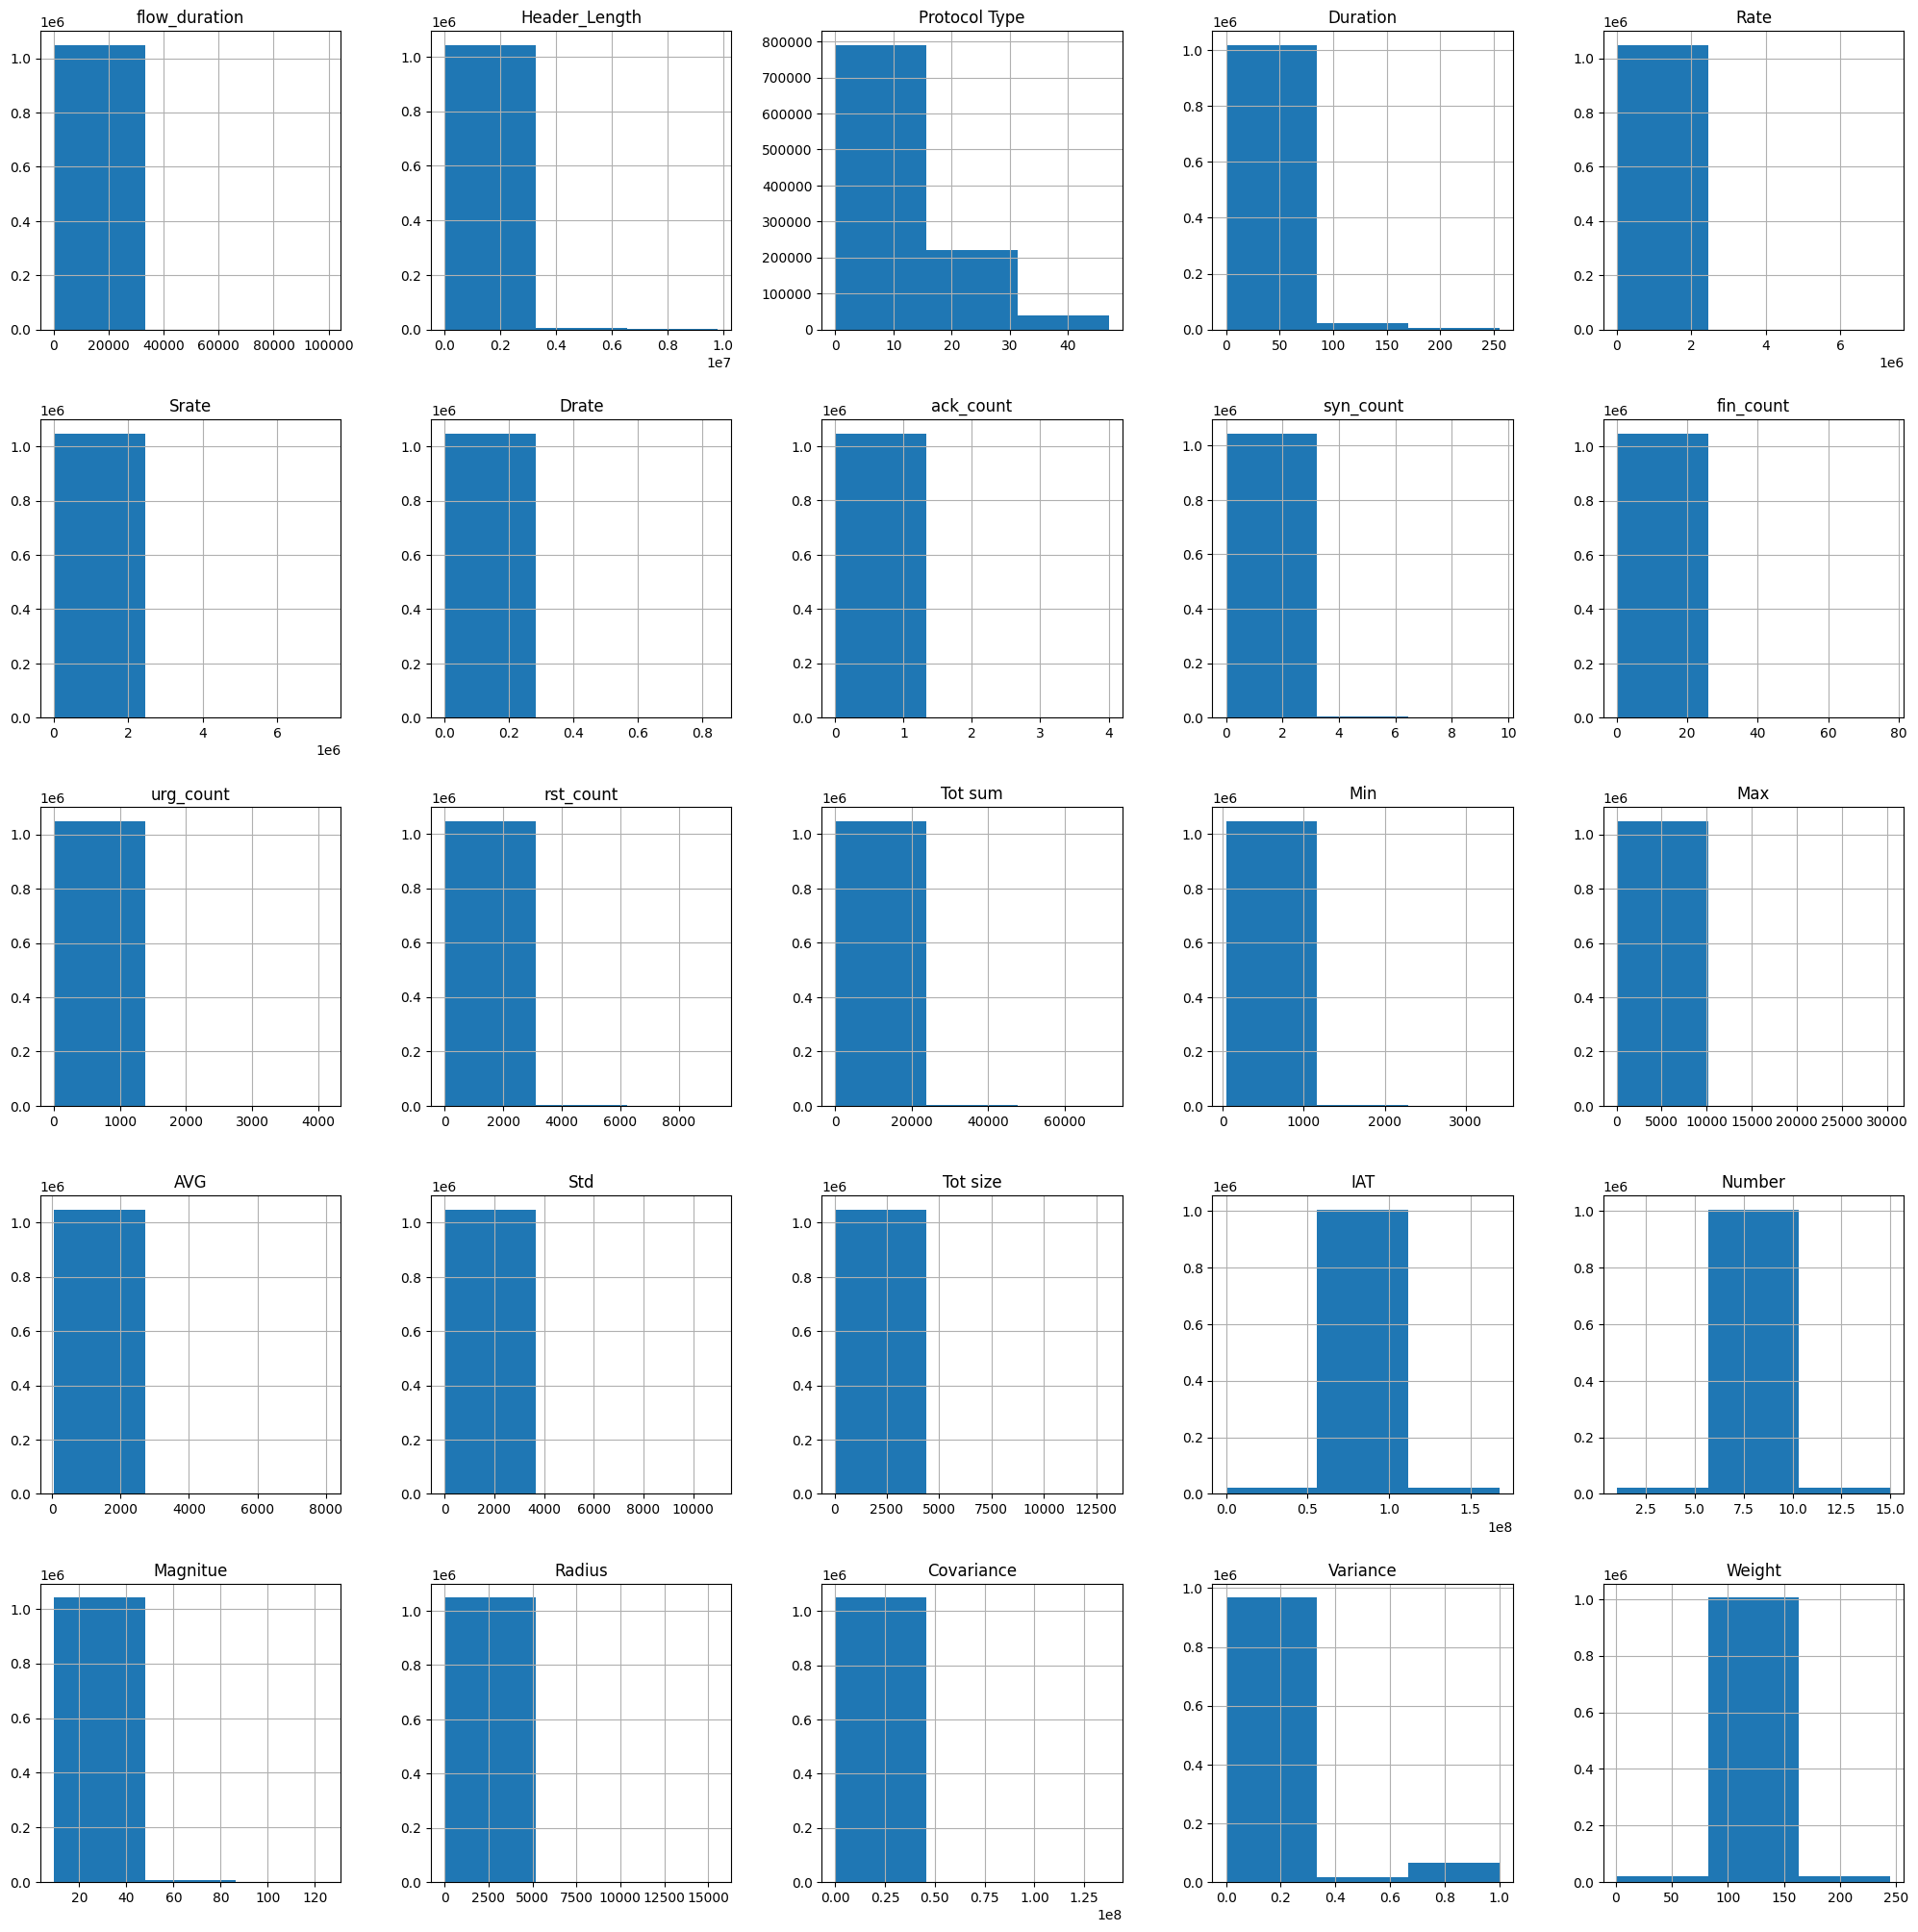

In [48]:
df[numeric_data].hist(figsize=(25, 25), bins=3)

In [49]:
# A column will be considered as able to be transformed via standardization if less data instances than the specified threshold are discarded when we trim the data up to 3sigma
def get_columns_for_standard_scaling(dataframe, numeric_cols, threshold):
    result = []

    for column in numeric_cols:
        column_std_3 = 3*dataframe[column].std()
        column_mean = dataframe[column].mean()
        total_data = dataframe[column].count()
        data_after_3_std = dataframe.loc[(dataframe[column]) < (column_mean + column_std_3)][column].count()

        if (total_data - data_after_3_std) < threshold:
            result.append(column)

    return result

In [50]:
valid_numeric_columns_for_standardization = get_columns_for_standard_scaling(df, numeric_data[:-1], 20000)
print(valid_numeric_columns_for_standardization)
print(len(valid_numeric_columns_for_standardization))

['flow_duration', 'Header_Length', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_count', 'urg_count', 'rst_count', 'Max', 'Covariance']
11


In [51]:
def outliers_dropping_based_in_3sigma(dataframe, numeric_cols_to_trim):

    for column in numeric_cols_to_trim:
        column_mean = dataframe[column].mean()
        column_3_sigma = 3*dataframe[column].std()

        dataframe = dataframe[(dataframe[column]) < (column_mean + column_3_sigma)]

    return dataframe

In [52]:
prueba_df = outliers_dropping_based_in_3sigma(df, valid_numeric_columns_for_standardization)

array([[<Axes: title={'center': 'flow_duration'}>,
        <Axes: title={'center': 'Header_Length'}>,
        <Axes: title={'center': 'Duration'}>],
       [<Axes: title={'center': 'Rate'}>,
        <Axes: title={'center': 'Srate'}>,
        <Axes: title={'center': 'Drate'}>],
       [<Axes: title={'center': 'fin_count'}>,
        <Axes: title={'center': 'urg_count'}>,
        <Axes: title={'center': 'rst_count'}>],
       [<Axes: title={'center': 'Max'}>,
        <Axes: title={'center': 'Covariance'}>, <Axes: >]], dtype=object)

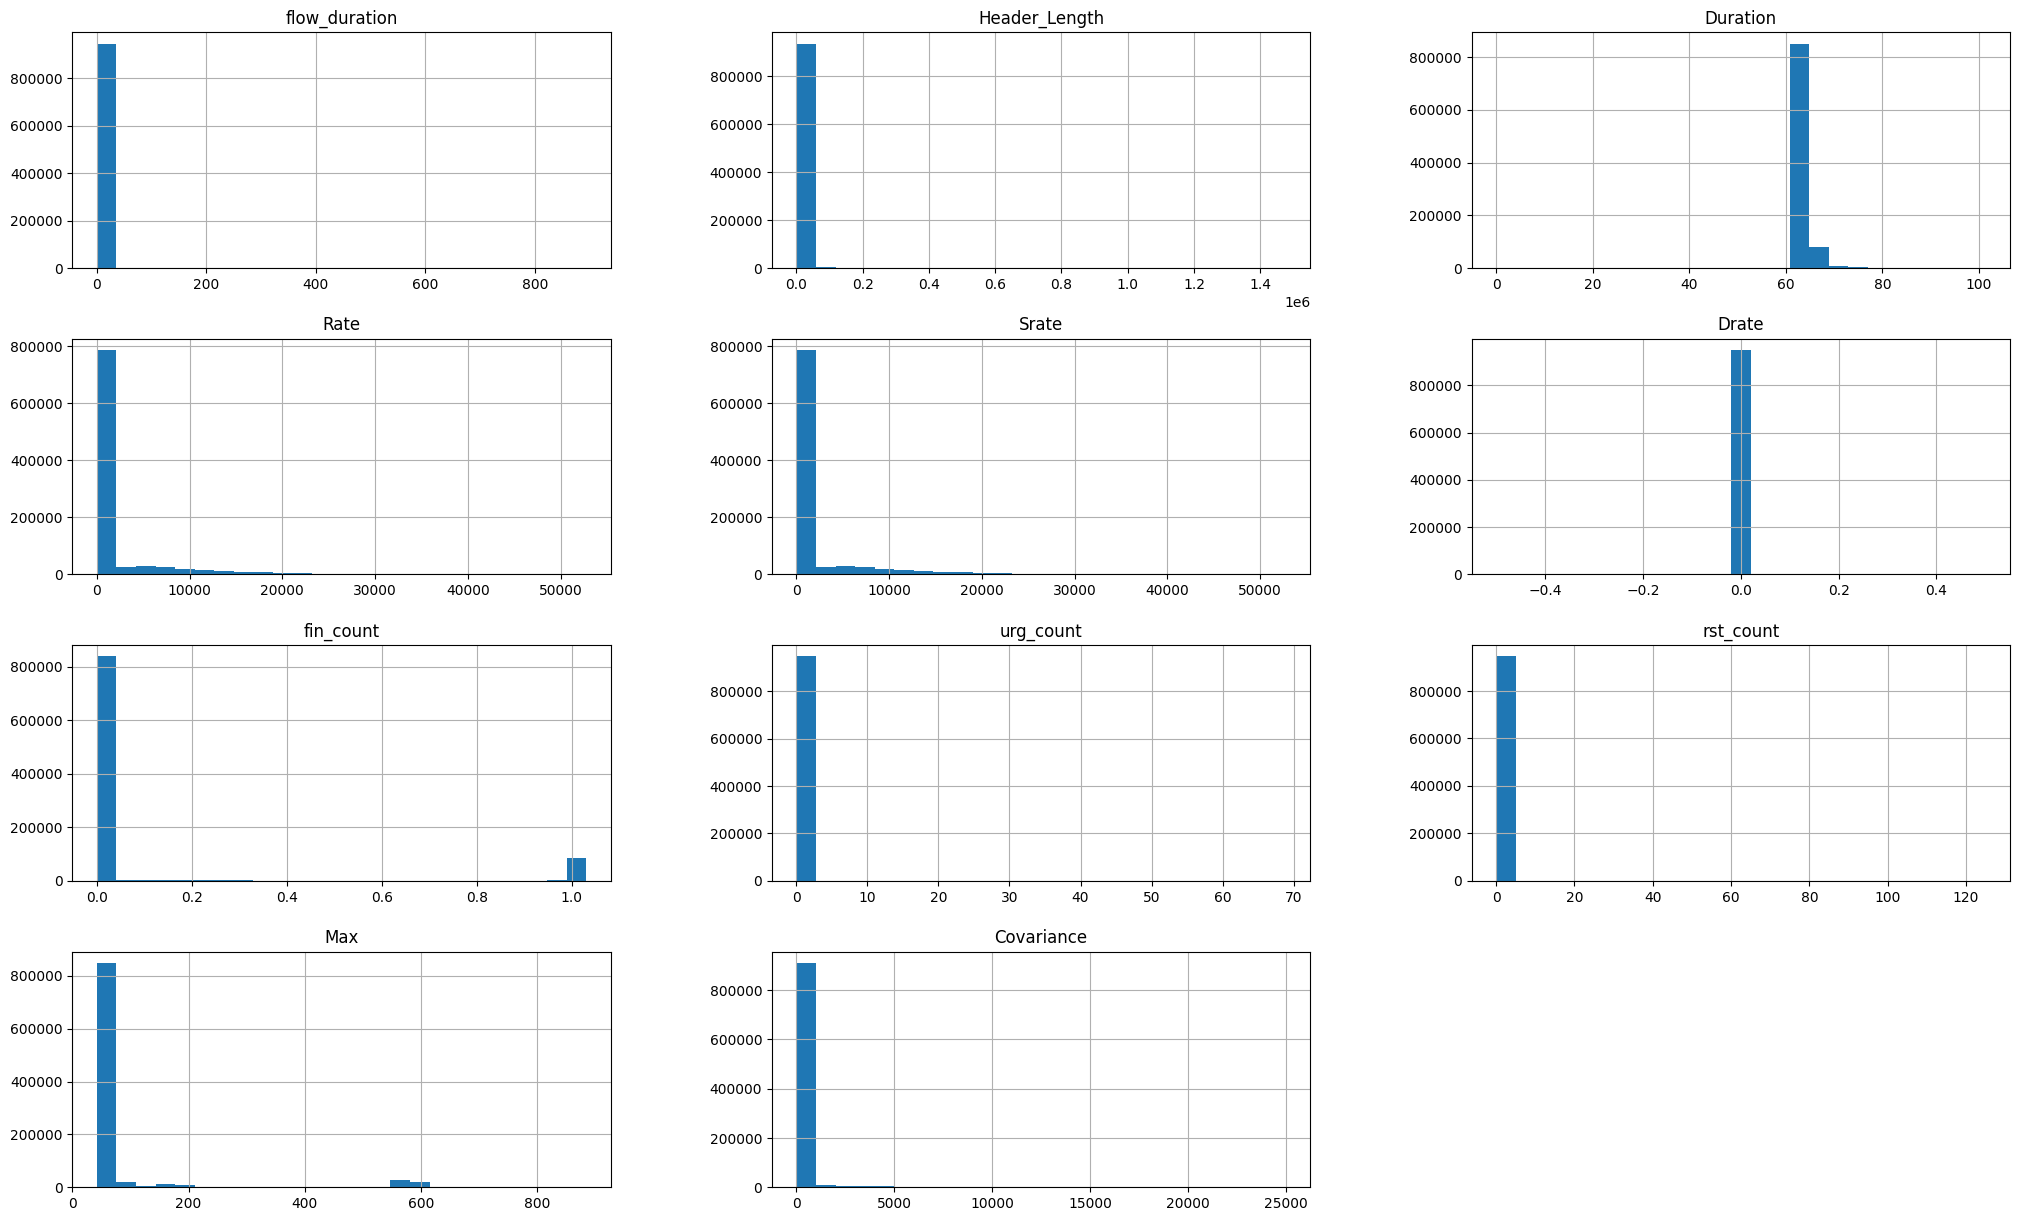

In [53]:
prueba_df[valid_numeric_columns_for_standardization].hist(figsize=(25, 15), bins=25)

# **Changes In The Target Variable**

In [54]:
all_labels = pd.unique(df["label"])

In [55]:
all_labels

array(['DDoS-RSTFINFlood', 'DoS-TCP_Flood', 'DDoS-ICMP_Flood',
       'DoS-UDP_Flood', 'DoS-SYN_Flood', 'Mirai-greeth_flood',
       'DDoS-SynonymousIP_Flood', 'Mirai-udpplain', 'DDoS-SYN_Flood',
       'DDoS-PSHACK_Flood', 'DDoS-TCP_Flood', 'DDoS-UDP_Flood',
       'BenignTraffic', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
       'Mirai-greip_flood', 'DoS-HTTP_Flood', 'DDoS-ICMP_Fragmentation',
       'Recon-PortScan', 'DNS_Spoofing', 'DDoS-UDP_Fragmentation',
       'Recon-OSScan', 'XSS', 'DDoS-HTTP_Flood', 'Recon-HostDiscovery',
       'CommandInjection', 'VulnerabilityScan', 'DDoS-SlowLoris',
       'Backdoor_Malware', 'BrowserHijacking', 'DictionaryBruteForce',
       'SqlInjection', 'Recon-PingSweep', 'Uploading_Attack'],
      dtype=object)

In [56]:
def no_underscore_labels_eraser(dataframe):
  return dataframe[(dataframe["label"].str.find("-") != -1) &
                   (dataframe["label"].str.find("-") != -1) |
                   (dataframe["label"] == "BenignTraffic")]

In [57]:
def label_transformer(label: str):
  if label == "BenignTraffic":
    return label

  character = "-" if "-" in label else "_"

  return label.split(character)[0]

In [58]:
def label_selection(dataframe):
  no_underscore_df = no_underscore_labels_eraser(dataframe)
  label_transformer_vec = np.vectorize(label_transformer)
  return label_transformer_vec(no_underscore_df["label"])

In [59]:
tmp_counter = 0
no_underscore_columns = []

for info in all_labels:

  if info.find("BenignTraffic") != -1:
    continue

  if info.find("-") == -1 and info.find("_") == -1:
    tmp_counter += 1
    no_underscore_columns.append(info)

print(no_underscore_columns)
tmp_counter/all_labels.shape[0]

['XSS', 'CommandInjection', 'VulnerabilityScan', 'BrowserHijacking', 'DictionaryBruteForce', 'SqlInjection']


0.17647058823529413

In [60]:
selected_lables = label_selection(df)
pd.unique(selected_lables)

array(['DDoS', 'DoS', 'Mirai', 'BenignTraffic', 'MITM', 'Recon'],
      dtype='<U13')

In [61]:
print(selected_lables.shape, df.shape[0])

(1042870,) 1048575


In [62]:
df_with_selected_labels = no_underscore_labels_eraser(df)
df_with_selected_labels.loc[:,"final_label"] = selected_lables

<ipython-input-62-c17c1e11bd8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_selected_labels.loc[:,"final_label"] = selected_lables


In [63]:
df_with_selected_labels.loc[:15, ["label", "final_label"]]

,label,final_label
0,DDoS-RSTFINFlood,DDoS
1,DoS-TCP_Flood,DoS
2,DDoS-ICMP_Flood,DDoS
3,DoS-UDP_Flood,DoS
4,DoS-SYN_Flood,DoS
5,Mirai-greeth_flood,Mirai
6,DDoS-SynonymousIP_Flood,DDoS
7,Mirai-udpplain,Mirai
8,DoS-UDP_Flood,DoS
9,DDoS-SYN_Flood,DDoS


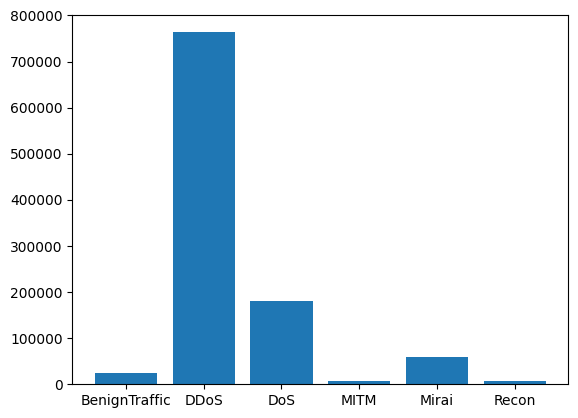

In [64]:
final_label_columns, counts_per_column = np.unique(df_with_selected_labels["final_label"], return_counts=True)

plt.bar(final_label_columns, counts_per_column)
plt.show()

# **Creation of the preprocessing pipeline**

In [65]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

In [66]:
print(valid_categorical_data)
print(valid_numeric_columns_for_standardization)

len(valid_categorical_data) + len(valid_numeric_columns_for_standardization)

['fin_flag_number', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number', 'ack_flag_number', 'HTTP', 'HTTPS', 'TCP', 'UDP', 'ICMP']
['flow_duration', 'Header_Length', 'Duration', 'Rate', 'Srate', 'Drate', 'fin_count', 'urg_count', 'rst_count', 'Max', 'Covariance']


21

In [67]:
column_trans =  ColumnTransformer(
    [
        ("num", StandardScaler(), valid_numeric_columns_for_standardization),
        ("cat", OrdinalEncoder(), valid_categorical_data)
    ]
)

# **Model generation**

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Input, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, clone_model, load_model
from keras.regularizers import l2

# Separation of variables and application of preprocessing

In [69]:
final_columns = valid_numeric_columns_for_standardization + valid_categorical_data + ["final_label"]
final_columns

['flow_duration',
 'Header_Length',
 'Duration',
 'Rate',
 'Srate',
 'Drate',
 'fin_count',
 'urg_count',
 'rst_count',
 'Max',
 'Covariance',
 'fin_flag_number',
 'syn_flag_number',
 'rst_flag_number',
 'psh_flag_number',
 'ack_flag_number',
 'HTTP',
 'HTTPS',
 'TCP',
 'UDP',
 'ICMP',
 'final_label']

In [70]:
X, y = df_with_selected_labels[final_columns[:-1]], df_with_selected_labels[final_columns[-1]]

In [71]:
from sklearn.preprocessing import LabelEncoder

label_enco = LabelEncoder()
y = label_enco.fit_transform(y.values.reshape(-1, 1))
class_names = label_enco.classes_

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [73]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(938583, 21)
(104287, 21)
(938583,)
(104287,)


In [74]:
num_of_labels = len(np.unique(y_test))

In [75]:
num_of_labels

6

# Definition of the models


In [77]:
#With dropout and regularization

model_1 = Sequential(
   [
    Input((21,)),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(128, activation="relu", kernel_regularizer=l2(0.1)),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu", kernel_regularizer=l2(0.1)),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(32, activation="relu", kernel_regularizer=l2(0.1)),
    Dense(16, activation="relu"),
    Dropout(0.1),
    Dense(32, activation="relu", kernel_regularizer=l2(0.1)),
    Dense(64, activation="relu"),
    Dense(num_of_labels, activation="softmax")
    ]
)

In [78]:
#Without dropout or regularization

model_2 = Sequential(
   [
    Input((21,)),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(num_of_labels, activation="softmax")
    ]
)

In [79]:
#With dropout and without regularization

model_3 = Sequential(
   [
    Input((21,)),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dropout(0.2),
    Dense(32, activation="relu"),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dropout(0.1),
    Dense(32, activation="relu"),
    Dense(64, activation="relu"),
    Dense(num_of_labels, activation="softmax")
    ]
)

In [80]:
def models_trainer(models_container: dict,
                   x_trn,
                   y_trn,
                   epochs: int,
                   checkpoint_path: str = ""
                   ):

  results = {}

  for name, model in models_container.items():

    model = clone_model(model)

    print(f"{name} model in training")

    checkpoint = ModelCheckpoint(
            f"{checkpoint_path}/{name}.keras",
            monitor= 'val_loss',
            verbose= 1,
            save_best_only= True,
        )

    early_stopping = EarlyStopping(
        monitor = "val_loss",
        patience = 10,
        verbose = 2
    )

    model.compile(
        optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics=["accuracy"]
        )

    print(x_trn.shape, y_trn.shape)

    history = model.fit(
                x_trn,
                y_trn,
                batch_size=512,
                epochs=epochs,
                validation_split=0.1,
                callbacks = [checkpoint, early_stopping]
            )

    results[f"{name}"] = (history, model)

  return results

In [81]:
models = {
    "Complete_model": model_1,
    "Most_simple_model": model_2,
    "No_regularization_model": model_3
}

In [93]:
results = models_trainer(models, X_train, y_train, 50, "/content/drive/MyDrive/CS")

Complete_model model in training
(938583, 21) (938583,)
Epoch 1/50
1649/1650 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7066 - loss: 18.1334
Epoch 1: val_loss improved from inf to 4.56173, saving model to /content/drive/MyDrive/CS/Complete_model.keras
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 26s 13ms/step - accuracy: 0.7067 - loss: 18.1246 - val_accuracy: 0.7805 - val_loss: 4.5617
Epoch 2/50
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7791 - loss: 3.3852
Epoch 2: val_loss improved from 4.56173 to 1.18173, saving model to /content/drive/MyDrive/CS/Complete_model.keras
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.7791 - loss: 3.3847 - val_accuracy: 0.8087 - val_loss: 1.1817
Epoch 3/50
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8053 - loss: 0.9601
Epoch 3: val_loss improved from 1.18173 to 0.54306, saving model to /content/drive/MyDrive/CS/Complete_model.keras
1650/1650 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.8053 - loss: 0.9600 - val_accurac

COMPLETE_MODEL


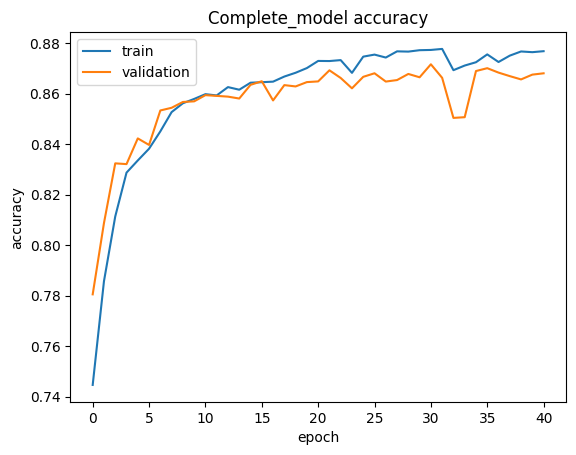

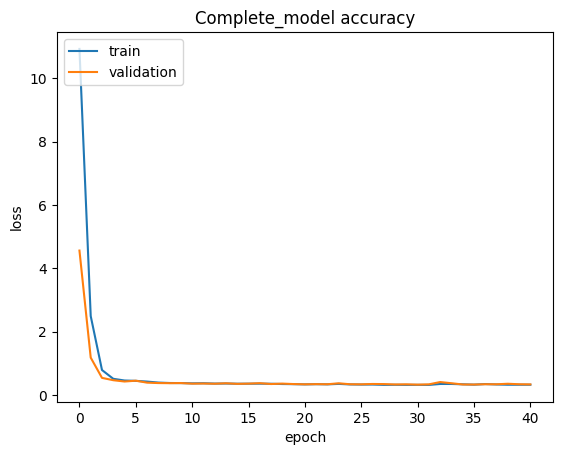

MOST_SIMPLE_MODEL


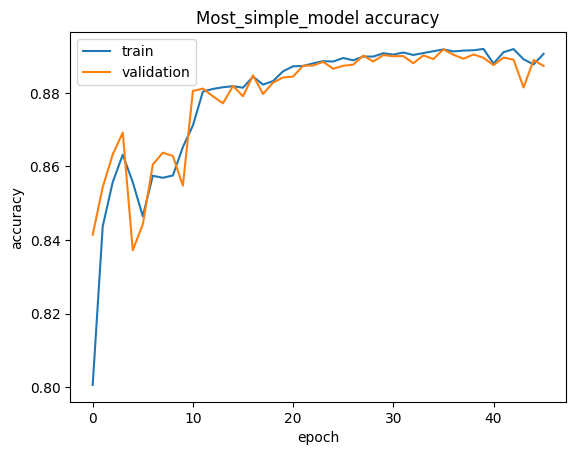

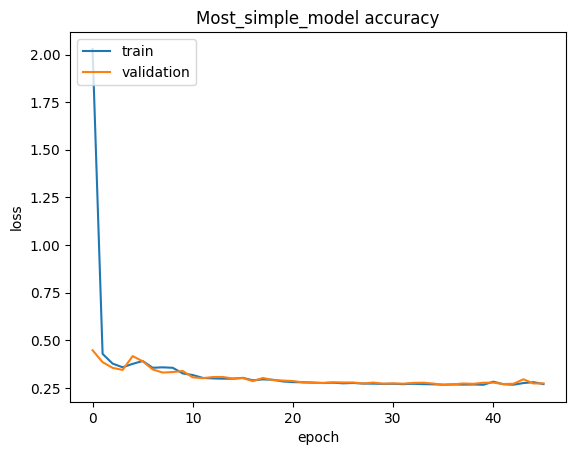

NO_REGULARIZATION_MODEL


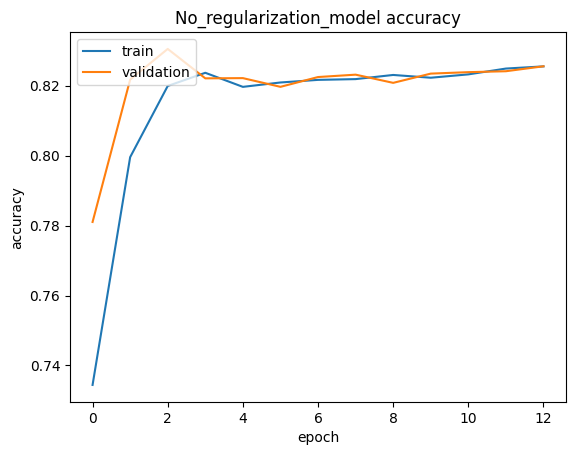

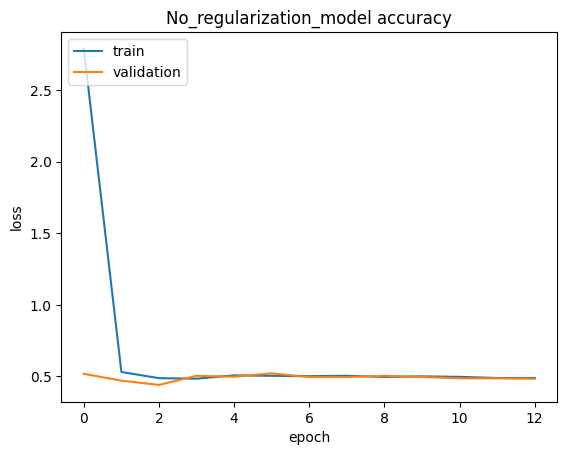

In [94]:
for model_name, info_tuple in results.items():
    history = info_tuple[0].history

    print(f"{model_name.upper()}")
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [95]:
def generate_confussion_matrix(y_true, y_predict, model_name: str, classes):
    predicted_labels_class = list(map(lambda x: classes[x], y_predict))
    y_true_labels_class = list(map(lambda x: classes[x], y_true))

    df_formatter = pd.DataFrame({
        "Clase predicha": predicted_labels_class,
        "Clase verdadera": y_true_labels_class
    })

    confussion_matrix = pd.crosstab(df_formatter["Clase predicha"],
                                    df_formatter["Clase verdadera"])
    plt.figure(figsize=(17, 5))
    plt.title(model_name)
    sns.heatmap(confussion_matrix, cmap="Blues", annot=True, fmt='g')
    plt.show()

In [96]:
tmp_model = load_model(f"/content/drive/MyDrive/CS/Complete_model.keras")

# Generation of Metrics

In [97]:
from sklearn.metrics import classification_report

Complete_model
3259/3259 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


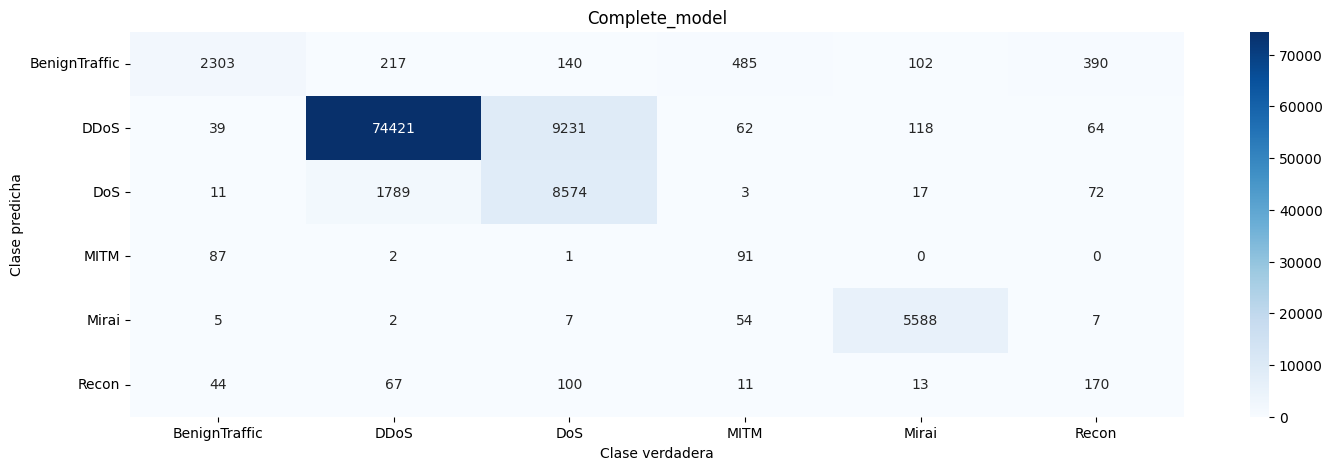

               precision    recall  f1-score   support

BenignTraffic       0.63      0.93      0.75      2489
         DDoS       0.89      0.97      0.93     76498
          DoS       0.82      0.47      0.60     18053
         MITM       0.50      0.13      0.21       706
        Mirai       0.99      0.96      0.97      5838
        Recon       0.42      0.24      0.31       703

     accuracy                           0.87    104287
    macro avg       0.71      0.62      0.63    104287
 weighted avg       0.87      0.87      0.86    104287

Most_simple_model
3259/3259 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


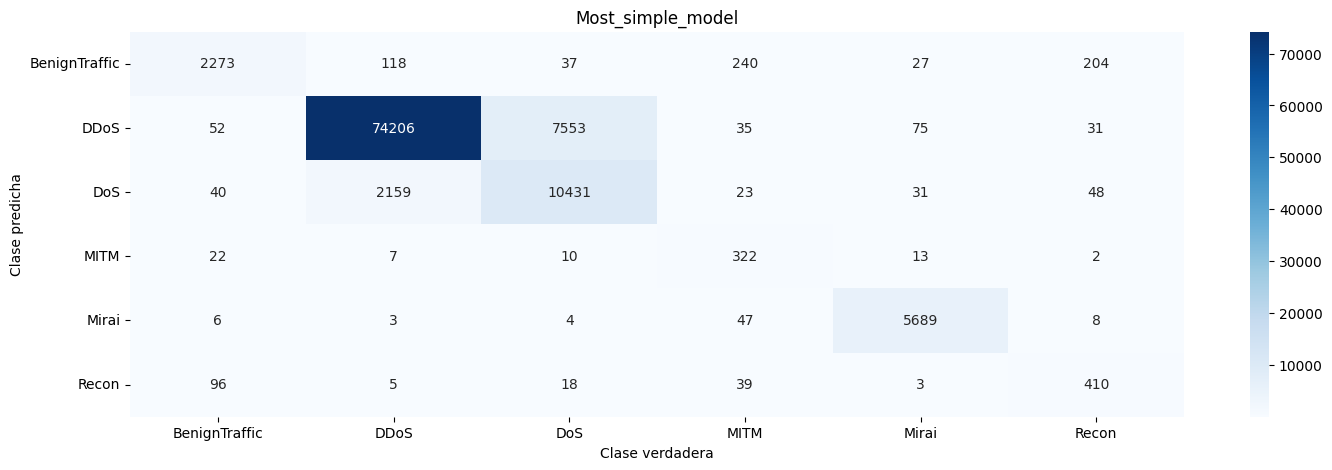

               precision    recall  f1-score   support

BenignTraffic       0.78      0.91      0.84      2489
         DDoS       0.91      0.97      0.94     76498
          DoS       0.82      0.58      0.68     18053
         MITM       0.86      0.46      0.60       706
        Mirai       0.99      0.97      0.98      5838
        Recon       0.72      0.58      0.64       703

     accuracy                           0.89    104287
    macro avg       0.85      0.75      0.78    104287
 weighted avg       0.89      0.89      0.89    104287

No_regularization_model
3259/3259 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


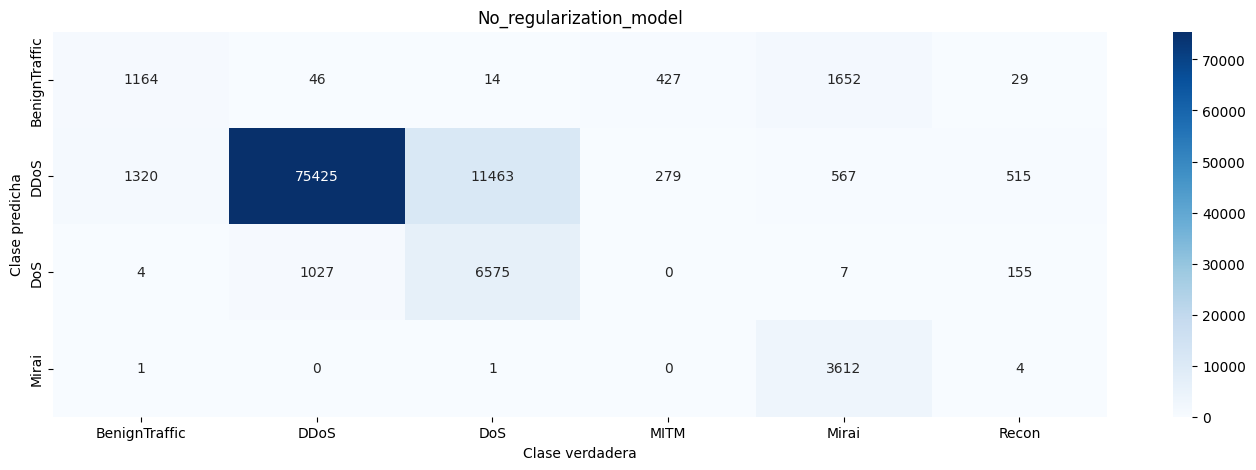

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


               precision    recall  f1-score   support

BenignTraffic       0.35      0.47      0.40      2489
         DDoS       0.84      0.99      0.91     76498
          DoS       0.85      0.36      0.51     18053
         MITM       0.00      0.00      0.00       706
        Mirai       1.00      0.62      0.76      5838
        Recon       0.00      0.00      0.00       703

     accuracy                           0.83    104287
    macro avg       0.51      0.41      0.43    104287
 weighted avg       0.83      0.83      0.81    104287



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [99]:
for model_name in results.keys():
    model = load_model(f"/content/drive/MyDrive/CS/{model_name}.keras")

    print(model_name)
    y_predict = np.argmax(model.predict(X_test), axis=1)
    generate_confussion_matrix(y_test, y_predict, model_name, class_names)
    print(classification_report(class_names[y_test], class_names[y_predict]))